## 1. Import the necessary libraries

In [4]:
from gensim.models import Word2Vec,KeyedVectors
import numpy as np
from tqdm import tqdm
import pandas as pd
from keras.utils import to_categorical
import numpy as np
from tensorflow.keras.utils import plot_model
from pyvi import ViTokenizer
import matplotlib.pyplot as plt
import import_ipynb
from data_process import remove_punctuation,remove_stopword
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.manifold import TSNE
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## 2 Data preprocessing

> Read File CSV

In [5]:
def ReadData(path):
    df=pd.read_csv(path,encoding='utf-8')
    return df['comment'], df['label']

> Execute function

In [6]:
X_train,y_train = ReadData("../data/mobile_feedback/Cleaned_Train.csv")
X_test,y_test=ReadData("../data/mobile_feedback/Cleaned_Test.csv")

In [7]:
print(f"X_Train size:{X_train.shape}")
print(f"y_train size {y_train.shape}")

X_Train size:(7786,)
y_train size (7786,)


> word separation

In [8]:
def wordseparation(comment):
    return [review.split() for review in comment]

In [9]:
X_train=wordseparation(X_train)
X_test=wordseparation(X_test)
print(f"X_Train: {X_train[0:2]}")
print(f"X_test: {X_test[0:2]}")

X_Train: [['mới', 'mua', 'máy', 'thegioididong', 'thốt_nốt', 'cảm_thấy', 'ok', 'bin', 'trâu', 'chụp', 'ảnh', 'đẹp', 'loa', 'nghe', 'to', 'bắt', 'wf', 'khỏe_sóng', 'ổn_định', 'giá_thành', 'túi_tiền', 'nhân_viên', 'tư_vấn', 'nhiệt_tình'], ['pin', 'kém', 'còn', 'miễn', 'chê', 'mua', '832019', 'tình_trạng', 'pin', 'còn', '88', 'ai', 'giống', 'tôi']]
X_test: [['điện', 'thoải', 'ổn', 'facelock', 'cực', 'nhanh', 'vân', 'tay', 'ôk', 'màn_hình', 'lớn', 'pin', 'trâu', 'liên_quân', 'zalo', 'youtube', 'một', 'ngày', 'mất', 'khoảng', '45', 'tuy', 'chip', '439', 'mượt', 'đa_nhiệm', 'khá', 'ổn'], ['mình', 'mới', 'mua', 'vivo91c', 'tải', 'ứng_dụng', 'games', 'nhanh', 'hài_lòng', 'cài', 'hình', 'nền', 'khóa', 'màn_hình', 'hay', 'mình', 'biết', 'hết', 'chức_năng', 'nó', 'tư_vấn', 'viên', 'nhiệt_tình']]


> word embedding

In [10]:
model_wordembedding = Word2Vec(sentences=X_train, vector_size=128, window=5, min_count=0, workers=4, sg=1)
model_wordembedding.wv.save("../model/word.model")

> Load Model_Word2Vec

In [11]:
model_embedding = KeyedVectors.load('../model/word.model')
num_words = len(model_embedding.index_to_key)
print("Number of Words:", num_words)
print("Vector:", model_embedding.get_vector('phần_mềm'))

Number of Words: 11621
Vector: [-0.14310743 -0.42152923  0.25359032  0.12548119  0.21760605 -0.08627567
 -0.11858012 -0.15108931 -0.42125484  0.4830602   0.428719    0.01268615
 -0.310549   -0.14939348  0.12308237  0.06263522 -0.42147338  0.17704949
 -0.18233219  0.06249215  0.13192758  0.03593961 -0.23592114 -0.4436986
 -0.08043863  0.22037718 -0.34749675  0.135334    0.09827736 -0.08688539
 -0.17610547  0.00770771  0.18819813 -0.03915339 -0.03123151  0.14234106
  0.6757278  -0.20096396  0.02780966 -0.15486467 -0.22535728 -0.02930036
  0.12295001 -0.27565864  0.33866203  0.2789616  -0.43800157 -0.18739824
 -0.11431136  0.29749995  0.08566422  0.12716304  0.3359834   0.11225991
 -0.18981622  0.04712526  0.19945858  0.03263465 -0.23922476 -0.17446204
  0.06872666  0.00234775  0.0774344  -0.11546038  0.3261717   0.23426531
 -0.01786946  0.2674521  -0.08742829 -0.3740475   0.2659574  -0.30075133
 -0.5581769  -0.09726594 -0.07864625 -0.29142874 -0.16236569  0.30423805
 -0.28731963  0.25556

> Get a list of vector representations of words

In [12]:
# Lấy danh sách các vectơ từ
vectors = [model_embedding.get_vector(word) for word in model_embedding.index_to_key]
vectors_array = np.array(vectors)
# Giảm chiều dữ liệu từ 128 chiều xuống còn 2 chiều bằng t-SNE
tsne = TSNE(n_components=2, random_state=42)
vectors_2d = tsne.fit_transform(vectors_array)
print(vectors_2d[0:2])

[[83.478035 -9.314884]
 [91.144035  4.172988]]


> Visualize the context and semantic correlation of words

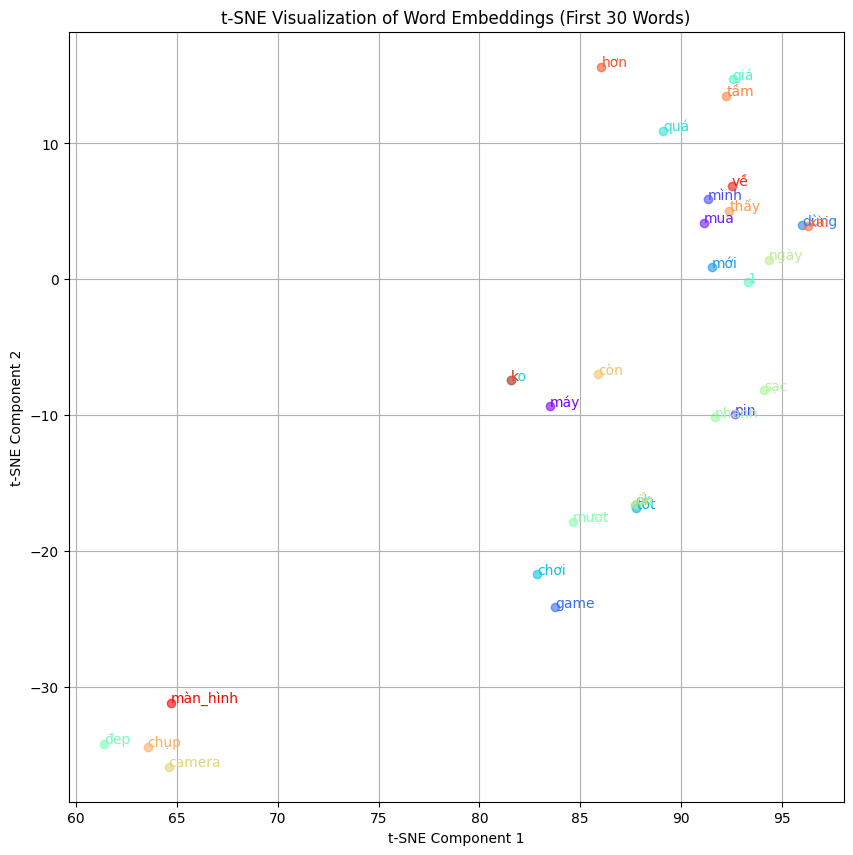

In [13]:
# Trực quan hóa các vectơ từ
plt.figure(figsize=(10, 10))
num_words = 30
# Màu cho mỗi từ
colors = plt.cm.rainbow(np.linspace(0, 1, num_words))

# Vẽ các điểm dữ liệu (từ) với màu khác nhau
for i, word in enumerate(model_embedding.index_to_key[:num_words]):  
    plt.scatter(vectors_2d[i, 0], vectors_2d[i, 1], marker='o', color=colors[i], alpha=0.6)
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=10, color=colors[i])

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Word Embeddings (First 30 Words)')
plt.grid(True)
plt.show()


> Corpus

In [14]:
model_embedding.key_to_index

{'máy': 0,
 'mua': 1,
 'pin': 2,
 'mình': 3,
 'game': 4,
 'dùng': 5,
 'mới': 6,
 'tốt': 7,
 'chơi': 8,
 'ko': 9,
 'quá': 10,
 'ok': 11,
 'giá': 12,
 '1': 13,
 'đẹp': 14,
 'mượt': 15,
 'nhanh': 16,
 'sạc': 17,
 'ngày': 18,
 'ổn': 19,
 'camera': 20,
 'còn': 21,
 'chụp': 22,
 'thấy': 23,
 'tầm': 24,
 'xài': 25,
 'hơn': 26,
 'k': 27,
 'về': 28,
 'màn_hình': 29,
 'trâu': 30,
 'trong': 31,
 'hơi': 32,
 'đc': 33,
 'khá': 34,
 'sản_phẩm': 35,
 '2': 36,
 'lỗi': 37,
 'tay': 38,
 'tháng': 39,
 'sao': 40,
 'hay': 41,
 'nhân_viên': 42,
 'mọi': 43,
 'sử_dụng': 44,
 'con': 45,
 'hình': 46,
 'sài': 47,
 'hết': 48,
 'vân': 49,
 'nói_chung': 50,
 'nhiệt_tình': 51,
 'ngon': 52,
 'thứ': 53,
 'nóng': 54,
 'lắm': 55,
 '3': 56,
 'nghe': 57,
 'nó': 58,
 'loa': 59,
 'luôn': 60,
 'điện_thoại': 61,
 'khác': 62,
 'tệ': 63,
 'lag': 64,
 'ảnh': 65,
 'người': 66,
 'wifi': 67,
 'xem': 68,
 'mấy': 69,
 'ở': 70,
 'nào': 71,
 'biết': 72,
 'bạn': 73,
 'lần': 74,
 'dc': 75,
 'cấu_hình': 76,
 'đổi': 77,
 'nói': 78,
 'hàng'

> Check to see how many words the longest sentence has

In [15]:
max_sequence = max([len(seq) for seq in X_train])
max_sequence_t=max ([len(seq) for seq in X_test ])
print(max_sequence)
print(max_sequence_t)

129
130


> representation for unknown words

In [16]:
embedding_size = 128

> convert words to vector space and padding

In [17]:
def comment_embedding(comment):
    matrix = np.zeros((131, embedding_size))
    for i, word in enumerate(comment):
            if word in model_embedding:
                matrix[i] = model_embedding.get_vector(word)
    return matrix

> Execute Function

In [18]:
train_data = []
test_data =[]
for x in tqdm(X_train):
    train_data.append(comment_embedding(x))
for y in tqdm(X_test): 
    test_data.append(comment_embedding(y))
test_data=np.array(test_data)
train_data=np.array(train_data)

100%|██████████| 2224/2224 [00:00<00:00, 4943.98it/s]


> Convert labels to numbers

In [19]:
label_encoder = LabelEncoder()
# Mã hóa các nhãn văn bản thành các giá trị số
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded=label_encoder.fit_transform(y_test)
print(y_train_encoded[0:3])

[2 1 0]


> Convert label to one_hot_vector

In [20]:
# Biểu diễn nhãn dưới dạng one-hot vector
y_train_onehot = to_categorical(y_train_encoded)
print(y_train_onehot[0:3])

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


## 3.Built Model CNN

### 3.1. Design configuration for CNN network

In [21]:
num_classes = 3
filter_sizes = 3
num_filters = 150
epochs = 74
dropout_rate = 0.3
embedding_size=128

> transform input properties

In [22]:
x_train = train_data.reshape(train_data.shape[0], 131, embedding_size, 1).astype('float32')

### 3.2. Model CNN

In [23]:
# Define the model
model = Sequential()
# Add a convolutional layer
model.add(Conv2D(num_filters, (filter_sizes, embedding_size), activation='relu',
                 input_shape=(131, embedding_size, 1),name='convolution_layer'))
model.add(MaxPooling2D(pool_size=(2, 1),strides=(2, 1),name='max_pooling'))
model.add(Dropout(dropout_rate))
model.add(Flatten())
model.add(Dense(9, activation='relu',name='layer_dense_1'))
model.add(Dense(9, activation='relu',name='layer_dense_2'))
model.add(Dense(9, activation='relu',name='layer_dense_3'))
model.add(Dense(9, activation='relu',name='layer_dense_4'))
model.add(Dense(9, activation='relu',name='layer_dense_5'))
model.add(Dense(9, activation='relu',name='layer_dense_6'))
model.add(Dense(9, activation='relu',name='layer_dense_7'))
model.add(Dense(9, activation='relu',name='layer_dense_8'))
model.add(Dense(3, activation='softmax'))

c:\Users\hdang\.virtualenvs\DM-xmUrTfoX\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


### 3.3. Hyperparameter

In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### 3.4. Train

> Monitor the trainning process to stop earlier

In [25]:
# Khởi tạo callback EarlyStopping
early_stopping_callback = EarlyStopping(
    monitor='loss', 
    patience=5,          
    restore_best_weights=True  
)

In [26]:
model.fit(
    x_train,
    y_train_onehot,
    verbose=1,
    epochs=epochs,
    callbacks=[early_stopping_callback] 
)

Epoch 1/74
244/244 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.5764 - loss: 0.9217
Epoch 2/74
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7870 - loss: 0.6856
Epoch 3/74
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7999 - loss: 0.6341
Epoch 4/74
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8125 - loss: 0.5757
Epoch 5/74
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8157 - loss: 0.5511
Epoch 6/74
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8132 - loss: 0.5369
Epoch 7/74
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8164 - loss: 0.5221
Epoch 8/74
244/244 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8243 - loss: 0.4990
Epoch 9/74
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8291 - loss: 0.4593
Epoch 10/74
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8351 - loss: 0.4348
Epoch 11/74
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8398 - loss: 0.4168
Epoch 12/74
244/244 ━━━━━━━━━━━━━━━━━━━━ 

>Network Architecture

In [27]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convolution_layer (Conv2D)      │ (None, 129, 1, 150)    │        57,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling (MaxPooling2D)      │ (None, 64, 1, 150)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 1, 150)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_dense_1 (Dense)           │ (None, 9)              │        86,409 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_dense_2 (Dense)           │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_dense_3 (Dense)           │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_dense_4 (Dense)           │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_dense_5 (Dense)           │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_dense_6 (Dense)           │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_dense_7 (Dense)           │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_dense_8 (Dense)           │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │            30 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 434,459 (1.66 MB)

 Trainable params: 144,819 (565.70 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 289,640 (1.10 MB)

None


> Network Architecture Diagram

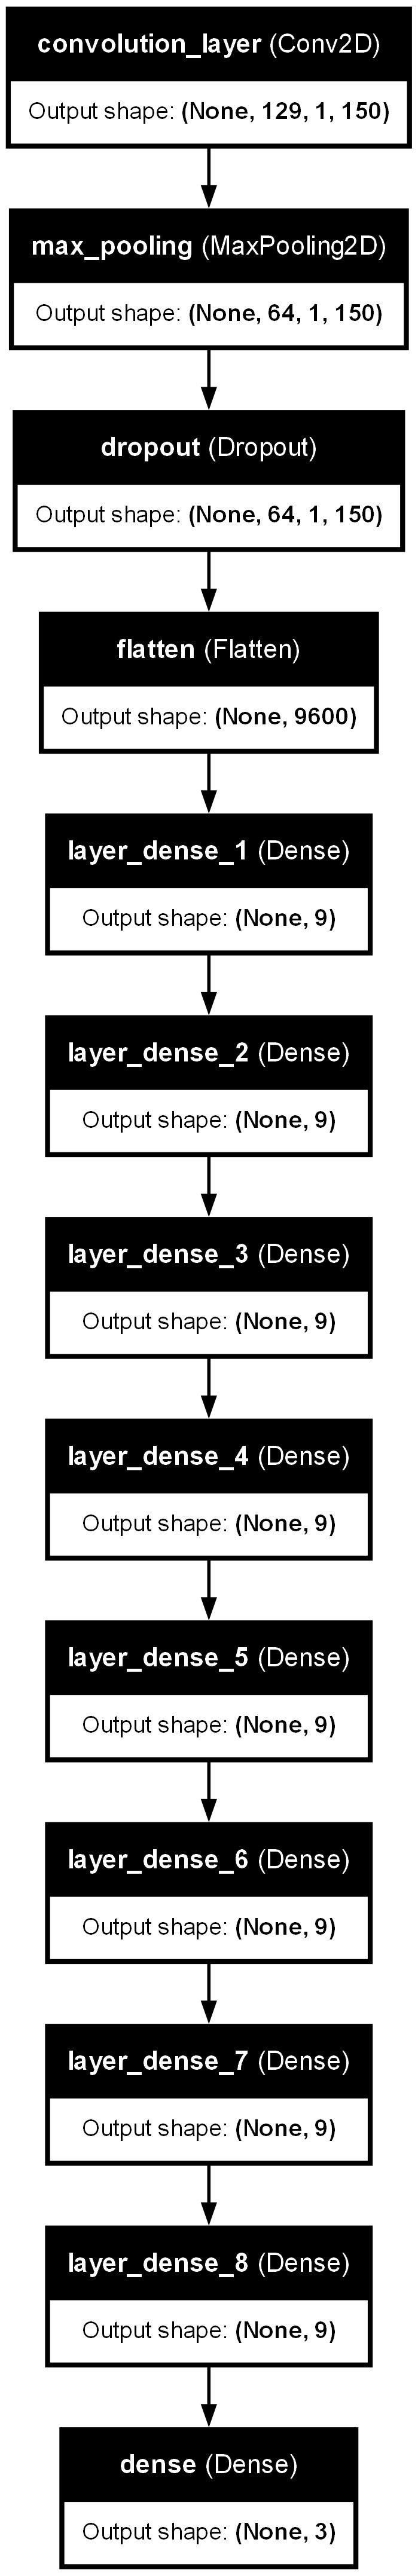

In [28]:
plot_model(model, to_file='../Picture_Model/model_CNN_sentiment_plot.png', show_shapes=True, show_layer_names=True)

> Dump file model_cnn_sentiment.h5

In [29]:
model.save('../model/model_cnn_sentiment.h5')

### 3.5 Evaluation test dataset

> Load file models_sentiment.h5

In [30]:
model_sentiment=load_model("../model/model_cnn_sentiment.h5")

> predict  test dataset 

In [31]:
result = model_sentiment.predict(test_data)

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


> First 10 lines of comments

In [32]:
predict_labels = np.argmax(result,axis=1)
print(predict_labels[0:10])
# Decode the predicted labels
predicted_labels_decoded = label_encoder.inverse_transform(predict_labels)
print(predicted_labels_decoded[0:10])


[2 1 2 0 2 0 2 2 2 2]
['Positive' 'Neutral' 'Positive' 'Negative' 'Positive' 'Negative'
 'Positive' 'Positive' 'Positive' 'Positive']


> Data Preprocessing sample

In [33]:
def Preprocessing(comment):
    comment= remove_punctuation(comment.lower())
    comment= remove_stopword(comment)
    comment= [ViTokenizer.tokenize(comment)]
    comment = wordseparation(comment)
    comment =np.expand_dims(comment_embedding(comment[0]),axis=0)
    return comment

> Predict one a new sample

In [34]:
comment = "Tôi mới mua iphone 15 pro max pin trâu màn hình đẹp dễ sử dụng"
comment_preprocessed=Preprocessing(comment)
result_one = model_sentiment.predict(comment_preprocessed)
result_one = np.argmax(result_one,axis=1)
# Decode the predicted labels
print(label_encoder.inverse_transform(result_one))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
['Positive']


> Evaluate the model through Accuracy measures,Precision,Recall,F1-score,

In [35]:
accuracy = accuracy_score(y_test_encoded, predict_labels)
print(f'Accuracy: {accuracy:.4f}')

precision = precision_score(y_test_encoded, predict_labels, average='weighted')
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test_encoded, predict_labels, average='weighted')
print(f"Recall: {recall:.4f}")

f1score = f1_score(y_test_encoded, predict_labels, average='weighted')
print(f"F1-score: {f1score}")

Accuracy: 0.7909
Precision: 0.7910
Recall: 0.7909
F1-score: 0.7906865163848753
